# Risk Segmentation

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
df = pd.read_csv("Feature_Engineered_Funding_Data.csv")
df.head(5)

,institution_id,funding_source,funding_amount,maturity_date,refinancing_needed,interest_spread,funding_currency,days_to_maturity,credit_rating,z_score_spread,maturity_bucket,spread_level,funding_size_class,rating_score,is_foreign_currency,adjusted_spread,risk_bucket
0,INST0,equity,1.339455e+08,2025-01-01,0,30.54,JPY,148,A,-1.273219,short_term,low,small,3,1,0.206351,low_risk
1,INST1,interbank,2.864152e+08,2025-01-02,0,13.57,GBP,438,A,-0.744598,long_term,low,medium,3,1,0.030982,low_risk
2,INST2,equity,9.993584e+08,2025-01-03,0,-4.54,USD,637,B,1.727216,long_term,low,large,6,0,-0.007127,low_risk
3,INST3,bond,2.744035e+08,2025-01-04,1,57.77,EUR,667,B,-0.786244,long_term,medium,medium,6,1,0.086612,moderate_risk
4,INST4,equity,8.187816e+08,2025-01-05,0,34.79,GBP,85,D,1.101146,short_term,low,large,8,1,0.409294,low_risk


In [14]:
# Group by the risk segments (risk buckets, credit rating, rating score)
risk_segmentation = df.groupby(['risk_bucket', 'credit_rating', 'rating_score']).agg({
    'institution_id': 'nunique', # Count of unique institution
    'funding_amount': ['count', 'sum', 'mean'], # Deal count, totan and average funding
    'interest_spread': 'mean', # Average interest spread
    'refinancing_needed': 'mean', # Refinancing Probability
})
risk_segmentation.head(5)

institution_id funding_amount  \
                                              nunique          count   
risk_bucket credit_rating rating_score                                 
low_risk    A             3                      7389          12455   
            AA            2                      7382          12553   
            AAA           1                      7423          12678   
            B             6                      2707           3069   
            BB            5                      3564           4279   

                                                                    \
                                                 sum          mean   
risk_bucket credit_rating rating_score                               
low_risk    A             3             6.224737e+12  4.997781e+08   
            AA            2             6.307158e+12  5.024423e+08   
            AAA           1             6.368711e+12  5.023435e+08   
            B             6             1.538017e+12  5.011460e+08   
            BB            5             2.143699e+12  5.009814e+08   

                                       interest_spread refinancing_needed  
                                                  mean               mean  
risk_bucket credit_rating rating_score                                     
low_risk    A             3                  50.019667           0.305500  
            AA            2                  49.941520           0.298972  
            AAA           1                  49.952648           0.299968  
            B             6                  30.918355           0.302379  
            BB            5                  42.978946           0.313391

In [16]:
# I have to flatten the multindex as shown above for better clarity
risk_segmentation.columns = [
    'risk_bucket', 'credit_rating', 'rating_score',
    'unique_institutions', 'deal_count', 'total_funding',
]
risk_segmentation.head(5)

risk_bucket  credit_rating  \
risk_bucket credit_rating rating_score                               
low_risk    A             3                    7389          12455   
            AA            2                    7382          12553   
            AAA           1                    7423          12678   
            B             6                    2707           3069   
            BB            5                    3564           4279   

                                        rating_score  unique_institutions  \
risk_bucket credit_rating rating_score                                      
low_risk    A             3             6.224737e+12         4.997781e+08   
            AA            2             6.307158e+12         5.024423e+08   
            AAA           1             6.368711e+12         5.023435e+08   
            B             6             1.538017e+12         5.011460e+08   
            BB            5             2.143699e+12         5.009814e+08   

                                        deal_count  total_funding  
risk_bucket credit_rating rating_score                             
low_risk    A             3              50.019667       0.305500  
            AA            2              49.941520       0.298972  
            AAA           1              49.952648       0.299968  
            B             6              30.918355       0.302379  
            BB            5              42.978946       0.313391

In [18]:
# Group by risk buckets and calculates descriptive statistics for adjusted spread
adjusted_spread_by_each_risk = df.groupby('risk_bucket')['adjusted_spread'].agg(
    avg_adjusted_spread='mean',
    median_adjusted_spread='median',
    std_adjusted_spread='std',
    min_adjusted_spread='min',
    max_adjusted_spread='max',
    count='count'
).reset_index()
adjusted_spread_by_each_risk.head(5)

,risk_bucket,avg_adjusted_spread,median_adjusted_spread,std_adjusted_spread,min_adjusted_spread,max_adjusted_spread,count
0,low_risk,0.447725,0.125265,2.264943,-0.425000,95.89,55678
1,moderate_risk,0.534650,0.146542,2.614304,0.055062,68.85,40883
2,very_high_risk,0.788904,0.210889,3.551874,0.096635,81.55,3439


In [19]:
# Sort risk buckets by average adjusted spread for clear plotting
adjusted_spread_by_risk_sorted = adjusted_spread_by_each_risk.sort_values(by='avg_adjusted_spread')

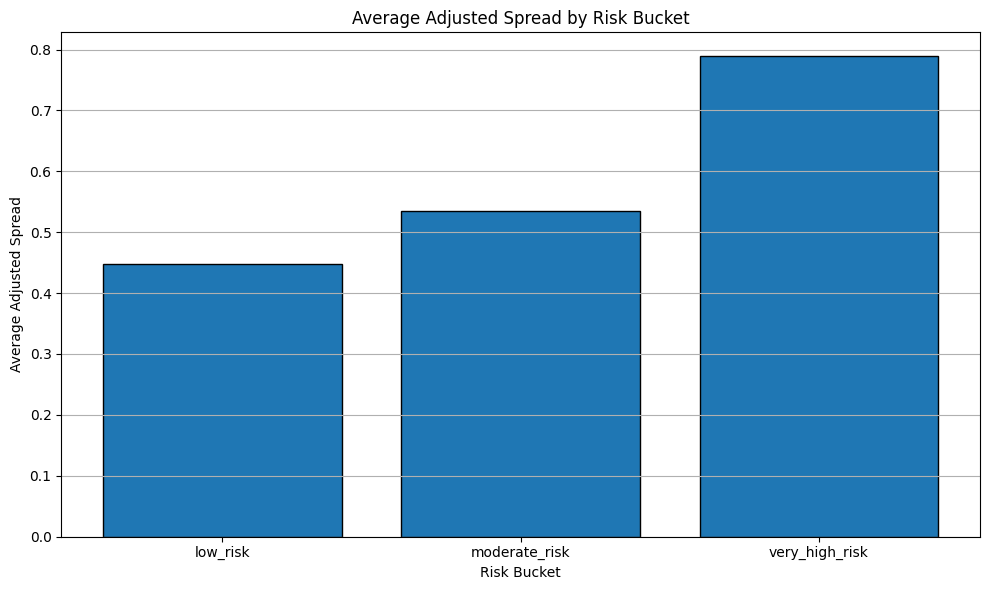

In [23]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    adjusted_spread_by_risk_sorted['risk_bucket'],
    adjusted_spread_by_risk_sorted['avg_adjusted_spread'],
    edgecolor='black'
)

# Plot styling
plt.title('Average Adjusted Spread by Risk Bucket')
plt.xlabel('Risk Bucket')
plt.ylabel('Average Adjusted Spread')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

- Risk Forecasting without machine learning

In [25]:
# Count of refinancing_needed by risk_bucket
refinancing_counts = df.groupby(['risk_bucket', 'refinancing_needed']).size().unstack(fill_value=0)
refinancing_counts.head(5)

refinancing_needed,0,1
risk_bucket,,
low_risk,38858,16820
moderate_risk,28519,12364
very_high_risk,2427,1012


In [27]:
# Add a column for total and refinancing rate
refinancing_counts['Total'] = refinancing_counts.sum(axis=1)
if 1 in refinancing_counts.columns:
    refinancing_counts['Refinancing_Rate (%)'] = (refinancing_counts[1] / refinancing_counts['Total'] * 100).round(2)
else:
    refinancing_counts['Refinancing_Rate (%)'] = 0.0

refinancing_counts.head(5)

refinancing_needed,0,1,Total,Refinancing_Rate (%)
risk_bucket,,,,
low_risk,38858,16820,111386.21,15.10
moderate_risk,28519,12364,81796.24,15.12
very_high_risk,2427,1012,6907.43,14.65


In [28]:
# Display result
print(refinancing_counts)

refinancing_needed      0      1      Total  Refinancing_Rate (%)
risk_bucket                                                      
low_risk            38858  16820  111386.21                 15.10
moderate_risk       28519  12364   81796.24                 15.12
very_high_risk       2427   1012    6907.43                 14.65
